# Loading MNIST dataset from binary files

In [5]:
ls -la ../MNIST_dataset/MNIST/raw

total 130016
drwxr-xr-x  10 thomas  staff       320 Jan 10 18:48 ./
drwxr-xr-x   3 thomas  staff        96 Jan 10 18:47 ../
-rw-r--r--   1 thomas  staff   7840016 Jan 10 18:48 t10k-images-idx3-ubyte
-rw-r--r--   1 thomas  staff   1648877 Jan 10 18:48 t10k-images-idx3-ubyte.gz
-rw-r--r--   1 thomas  staff     10008 Jan 10 18:48 t10k-labels-idx1-ubyte
-rw-r--r--   1 thomas  staff      4542 Jan 10 18:48 t10k-labels-idx1-ubyte.gz
-rw-r--r--   1 thomas  staff  47040016 Jan 10 18:48 train-images-idx3-ubyte
-rw-r--r--   1 thomas  staff   9912422 Jan 10 18:48 train-images-idx3-ubyte.gz
-rw-r--r--   1 thomas  staff     60008 Jan 10 18:48 train-labels-idx1-ubyte
-rw-r--r--   1 thomas  staff     28881 Jan 10 18:48 train-labels-idx1-ubyte.gz


training set images in: train-images-idx3-ubyte

In [1]:
with open('../MNIST_dataset/MNIST/raw/t10k-images-idx3-ubyte', 'rb') as f:
    buffer = f.read()
    

In [3]:
import numpy as np


test = np.frombuffer(buffer, dtype='>i4', count=4, offset=0)
# should put an assert here 
test_set = np.frombuffer(buffer, dtype='B', count=28*28*10_000, offset=16).reshape(10000, 28, 28)


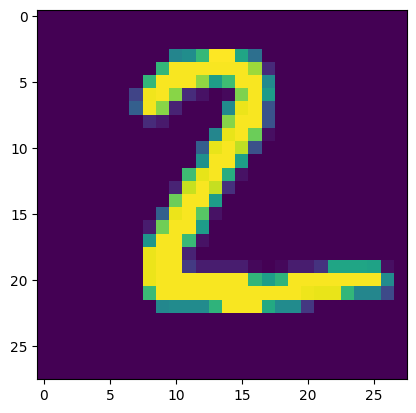

In [6]:
import matplotlib.pyplot as plt

im_test = test_set[1]
fig, ax = plt.subplots()
ax.imshow(im_test)

# try loading the same from NIST and compare (see Coldcase paper 2019)

In [21]:
from PIL import Image, ImageFilter, ImageOps

im_raw = Image.open('d2359_72_00055.png')
im = ImageOps.invert(im_raw)

In [24]:
im_arr = np.array(im)
im_arr = im_arr[:, :, 0]
im_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [25]:
is_row_empty = im_arr.any(1)
row_start = np.argmax(is_row_empty)
row_end = len(is_row_empty) - 1 - np.argmax(is_row_empty[::-1])

is_col_empty = im_arr.any(0)
col_start = np.argmax(is_col_empty)
col_end = len(is_col_empty) - 1 - np.argmax(is_col_empty[::-1])
row_start, row_end, col_start, col_end

(45, 83, 46, 82)

(39, 39)


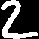

In [28]:
# Crop/normalize image into square bounding box
if row_end - row_start > col_end - col_start:
    n_pix = row_end - row_start + 1
    n_col = col_end - col_start + 1
    arr_norm = np.zeros((n_pix, n_pix), dtype='uint8')
    arr_norm[:, (n_pix - n_col) // 2:(n_pix - n_col) // 2 + n_col] \
        = im_arr[row_start:row_end + 1, col_start:col_end + 1]
else:
    n_pix = col_end - col_start + 1
    n_row = row_end - row_start + 1
    arr_norm = np.zeros((n_pix, n_pix), dtype='uint8')
    arr_norm[(n_pix - n_row) // 2:(n_pix - n_row) // 2 + n_row, :] \
        = im_arr[row_start:row_end + 1, col_start:col_end + 1]

im_norm = Image.fromarray(arr_norm, mode='L')
print(arr_norm.shape)
im_norm

In [90]:
im_20 = im_norm.resize((20, 20), resample=Image.Resampling.HAMMING)  # downsample to 20x20
arr_20 = np.array(im_20)

# Compute center of mass (cm) of pixels
# with correction of inverted axes bug and round instead of floor!
y_cm, x_cm = (np.mgrid[0:20, 0:20] * arr_20).sum(1).sum(1) / arr_20.sum()
row_cm, col_cm = round(y_cm), round(x_cm)

# tmp arr of double size to include 20x20 centered on cm
arr_40 = np.zeros((40, 40), dtype='uint8')
# cm is at ind [20, 20] in arr40
arr_40[20 - row_cm:20 - row_cm + 20, 20 - col_cm:20 - col_cm + 20] = arr_20

# im_28 = Image.fromarray(arr_40[(40 - 28) // 2:(40 - 28) // 2 + 28, \
#    (40 - 28) // 2:(40 - 28) // 2 + 28], mode='L')

# cm at ind 14 in arr_28
i_start = (40 - 28) // 2
arr_28 = arr_40[i_start:i_start + 28, i_start:i_start + 28]
im_28 = Image.fromarray(arr_28, mode='L')
im_28

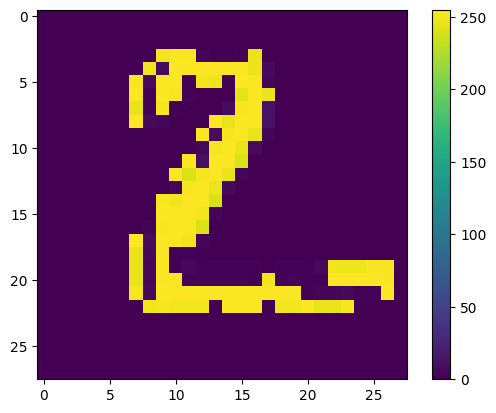

In [91]:
#fig, ax = plt.subplots(1, 3)
#ax[0].imshow(im_test)
#ax[1].imshow(arr_28)
#ax[2].imshow(im_test - arr_28)
fig, ax = plt.subplots()
plot = ax.imshow(im_test-arr_28)
fig.colorbar(plot, ax=ax)

In [92]:
#arr_28 - im_test


To be continued... see lush code for resamp from link in coldcase paper